### 선형회귀

In [22]:
import os
print(os.getcwd())
print(os.listdir())

c:\workspace\hit_ml_dl\course
['course.ipynb', 'dataset', 'experiment.ipynb', 'generate_profile.py', 'ml_practice.ipynb', 'pybw.ipynb', 'requirements.txt', 'setup_environment.ps1']


In [23]:
# 사전설치 : pip install numpy scikit-learn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

# 재현성(난수가 동일한 순서대로 출력)을 위해 random seed 설정
# random.seed(42)
# np.random.seed(42)

# 데이터 준비
X = np.array([[1], [2], [3], [4], [5]])  # 독립 변수
y = np.array([2, 4, 5, 4, 5])  # 종속 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
predictions = model.predict(X_test)

# 결과 출력
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])
print("\n모델 계수:")
print("기울기 (slope):", model.coef_[0])

print("절편 (intercept):", model.intercept_)
print("\n테스트 세트 실제 값:", y_test)
print("테스트 세트 예측 값:", predictions)
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, predictions))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, predictions))

학습 데이터 크기: 3
테스트 데이터 크기: 2

모델 계수:
기울기 (slope): 0.7857142857142857
절편 (intercept): 1.5714285714285716

테스트 세트 실제 값: [4 5]
테스트 세트 예측 값: [3.14285714 5.5       ]

모델 성능:
R² 점수: -0.9693877551020396
평균 제곱 오차 (MSE): 0.4923469387755099


데이터셋 크기: (768, 9)

처음 5개 행:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0 33.60   
1            1       85             66             29        0 26.60   
2            8      183             64              0        0 23.30   
3            1       89             66             23       94 28.10   
4            0      137             40             35      168 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1  

기술통계:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       768.00   768.00         768.00         768.00   768.00 768.00   
mean          3.85   120.89          69.11          20.54    79.80  31.99   
std           3.37    31.97          

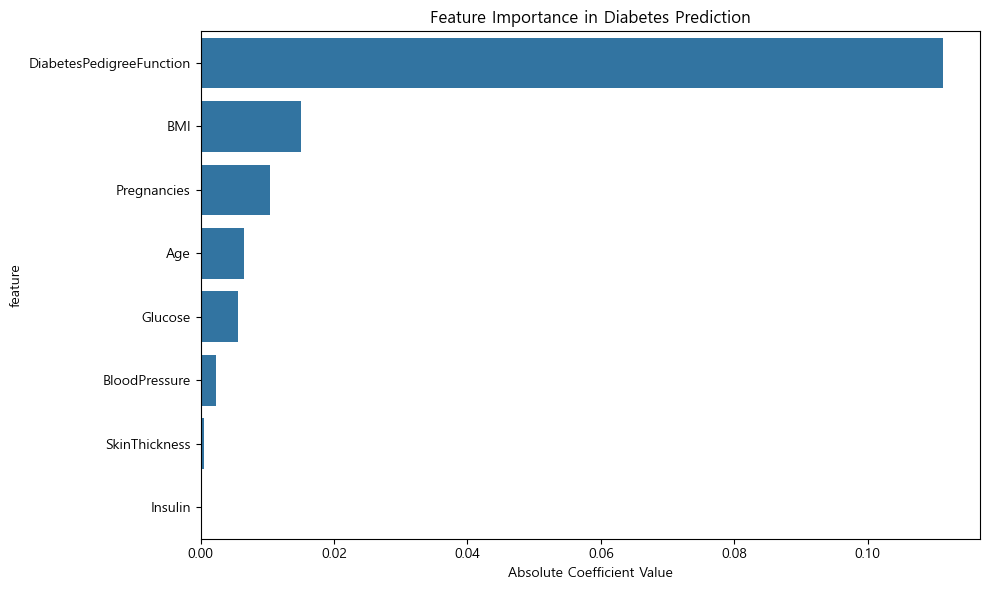

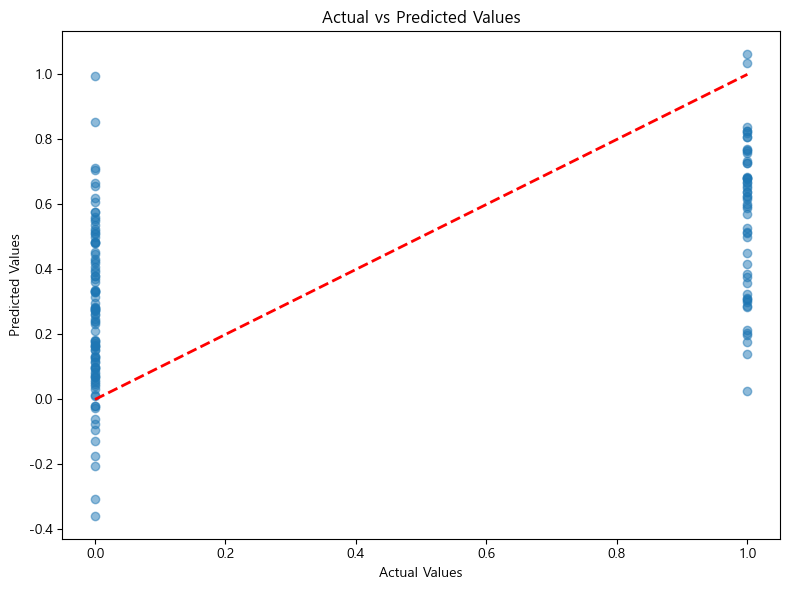

In [24]:
# 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예
# 분류 문제에 회귀 모델을 잘못 사용한 예
# Task: 회귀/분류 모델 각각에 대한 메트릭에는 무엇이 있고, 왜 사용하는지 조사
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('dataset/diabetes.csv')

# 데이터 확인
print("데이터셋 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())
print("\n기술통계:")
print(df.describe())

# 독립변수(X)와 종속변수(y) 분리
X = df.drop('Outcome', axis=1)  # Outcome을 제외한 모든 특성
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, y_pred))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred))
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred))

# 특성 중요도 분석
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n특성 중요도:")
print(feature_importance)

# 시각화: 특성 중요도
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

### 다중선형회귀

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4])  # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1])  # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75])  # 시험 점수

# 입력 데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))

y = test_scores

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print("회귀 계수:")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 새로운 데이터로 예측
new_student = np.array([[6, 2]])  # 공부 6시간, 과외 2시간
prediction = model.predict(new_student)
print(f"\n예측 점수: {prediction[0]:.1f}")

# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

# 예측 모델: LinearRegression, KNN, SVN, RandomForest, XGBoost, LightGBM, CatBoost, 등 모델 테스트
# 분류 모델: KNN, SVN, RandomForest, XGBoost, LightGBM, CatBoost, 등 모델 테스트

회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39

예측 점수: 86.5
R-squared: 0.9613


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 샘플 데이터 생성
np.random.seed(42)
n_samples = 100

# 독립변수 생성
X1 = np.random.normal(0, 1, n_samples)  # np.random.normal(평균, 표준편차, 생성할 난수 크기)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

# 종속변수 생성 (Y = 2X1 + 3X2 + 1.5X3 + 오차)

In [27]:
# 다중선형회귀
import numpy as np
from sklearn.linear_model import LinearRegression

# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4])  # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1])  # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75])  # 시험 점수

# 입력 데이터 형태 맞추기
# study_hours, tutor_hours 두 개의 특성을 하나의 행렬로 결합 (n, 2)
X = np.column_stack((study_hours, tutor_hours))

y = test_scores

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 결과 출력
# 사이킷런에서는 모델 학습 후 생기는 속성(attribute)에
# 사용자가 직접 설정하는 값과 구분하기 위해 _를 붙입니다.
print("회귀 계수:")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 새로운 데이터로 예측
new_student = np.array([[6, 2]])  # 공부 6시간, 과외 2시간
prediction = model.predict(new_student)
print(f"\n예측 점수: {prediction[0]:.1f}")

# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")


회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39

예측 점수: 86.5
R-squared: 0.9613


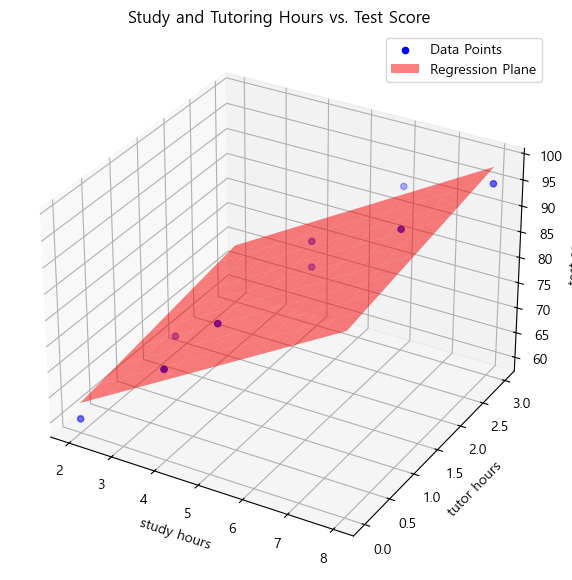

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 데이터 점 산점도
ax.scatter(study_hours, tutor_hours, test_scores, color='blue', label='Data Points')

# 회귀 평면 생성
# X1, X2 범위의 격자 생성
x1_range = np.linspace(min(study_hours), max(study_hours), 10)
x2_range = np.linspace(min(tutor_hours), max(tutor_hours), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# 회귀 평면의 Z 값(예측 점수) 계산
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid

# 회귀 평면 그리기
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5, label='Regression Plane')

# 축 라벨 설정
ax.set_xlabel('study hours')
ax.set_ylabel('tutor hours')
ax.set_zlabel('test score')
ax.set_title('Study and Tutoring Hours vs. Test Score')

# 범례 추가
ax.legend()

# 그래프 표시
plt.show()

회귀 계수:
X1: 1.7882
X2: 2.9284
X3: 1.5135

절편: 0.1535

R-squared 값: 0.9566
평균제곱근오차(RMSE): 0.7174


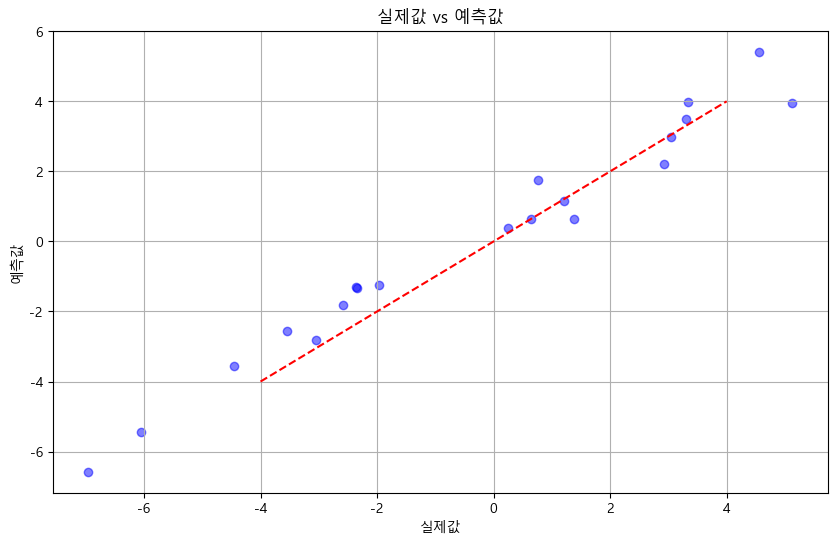


새로운 데이터 예측값: 3.2192


c:\workspace\hit_ml_dl\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 샘플 데이터 생성
np.random.seed(42)
n_samples = 100  # 생성할 난수 크기

# 독립변수 생성
X1 = np.random.normal(0, 1, n_samples)   # np.random.normal(평균, 표준편차, 생성할 난수 크기)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

# 종속변수 생성 (Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0, 1, n_samples)

# 데이터프레임 생성
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'Y': Y
})

# 학습용과 테스트용 데이터 분리
X = data[['X1', 'X2', 'X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print("회귀 계수:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\n절편: {model.intercept_:.4f}")
print(f"\nR-squared 값: {r2_score(y_test, y_pred):.4f}")
print(f"평균제곱근오차(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5) # alpha(투명도) : 0(투명), 0.5(반투명), 1(완전 불투명)
plt.plot([-4, 4], [-4, 4], 'r--')  # X축 [-4, 4], Y축 [-4, 4]: 이 부분은 선의 시작점과 끝점을 정의 r-- : red색 -- 점선으로 표시
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값')
plt.grid(True)
plt.show()

# 새로운 데이터로 예측 예시
new_data = np.array([[0.5, 1.0, -0.5]])
prediction = model.predict(new_data)
print(f"\n새로운 데이터 예측값: {prediction[0]:.4f}")

R-squared: 0.9755
공부 시간 3.8시간에 대한 예측 성적: 50.7


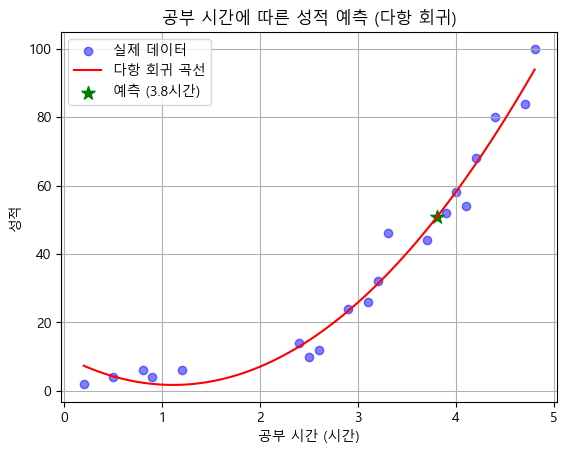

In [33]:
# 다항 회귀
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline  # 여러 단계를 순서대로 처리 및 연결(ex. 다항 특성변환과 선형회귀 순서대로 적용)

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# CSV 파일 읽기
dataset = pd.read_csv('./dataset/PolynomialRegressionData.csv')

# 데이터 준비
X = dataset['hour'].values.reshape(-1, 1)  # 공부 시간 (독립 변수)
y = dataset['score'].values  # 성적 (종속 변수)

# 다항 회귀 모델 생성 (2차 다항식)
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, y)

# 모델 성능 평가 (R-squared)
r_squared = polyreg.score(X, y)
print(f"R-squared: {r_squared:.4f}")

# 새로운 데이터로 예측 (공부 시간 3.8시간)
new_hours = np.array([[3.8]])
predicted_score = polyreg.predict(new_hours)
print(f"공부 시간 3.8시간에 대한 예측 성적: {predicted_score[0]:.1f}")

# 시각화
# 데이터 포인트 산점도
plt.scatter(X, y, color='blue', alpha=0.5, label='실제 데이터')

# 다항 회귀 곡선 그리기
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # 부드러운 곡선을 위해 범위 생성, reshape(-1, 1) scikit-learn은 2차원 배열로 표현 (samples, features)
y_pred = polyreg.predict(X_range)
plt.plot(X_range, y_pred, color='red', label='다항 회귀 곡선')

# 예측 데이터 포인트 표시
plt.scatter(new_hours, predicted_score, color='green', s=100, marker='*', label='예측 (3.8시간)')

# 그래프 설정
plt.xlabel('공부 시간 (시간)')
plt.ylabel('성적')
plt.title('공부 시간에 따른 성적 예측 (다항 회귀)')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

In [34]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=42, verbose=0)
sr.fit(X_train, y_train)

c:\workspace\hit_ml_dl\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,200
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


ValueError: x and y must be the same size

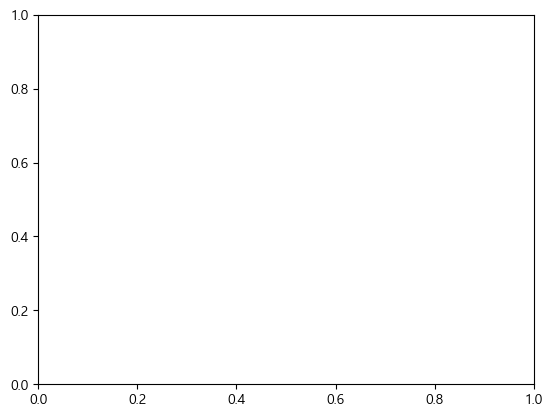

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
# iloc : 정수 위치 기반 (인덱스 방식)
# 사전설치: pip install pandas
import pandas as pd

data = {
    'col1': [10, 20, 30, 40],
    'col2': [100, 200, 300, 400],
    'col3': ['A', 'B', 'C', 'D']
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
print(df)

   col1  col2 col3
0    10   100    A
1    20   200    B
2    30   300    C
3    40   400    D


In [ ]:
# 첫 번째 행 선택
print(df.iloc[0])

col1     10
col2    100
col3      A
Name: 0, dtype: object


In [ ]:
# 두 번째 행, 첫 번째 열 선택
print(df.iloc[1, 0]) # 행 인덱스 1, 열 인덱스 0

20


In [ ]:
# 첫 번째부터 세 번째 행까지, 처음 두 열 선택 (0, 1)
print(df.iloc[0:3, 0:2])

   col1  col2
0    10   100
1    20   200
2    30   300


In [ ]:
# 사전학습(loc 함수): 레이블 이름 기반
data = {'col1': [10, 20, 30, 40],
        'col2': [100, 200, 300, 400],
        'col3': ['A', 'B', 'C', 'D']}

In [ ]:
df = pd.DataFrame(data, index=['a', 'b', 'c', 'd'])

In [ ]:
print(df)

   col1  col2 col3
a    10   100    A
b    20   200    B
c    30   300    C
d    40   400    D


In [ ]:
# 인덱스 'a' 행 선택
print(df.loc['a'])

col1     10
col2    100
col3      A
Name: a, dtype: object


In [ ]:
# 인덱스 'a' 행 선택
print(df.loc['a'])

col1     10
col2    100
col3      A
Name: a, dtype: object


In [ ]:
# 인덱스 'b' 행, 'col1' 열 선택
print(df.loc['b', 'col1'])

20


In [ ]:
# 인덱스 'a'부터 'c'까지 행, 'col1'과 'col2' 열 선택
print(df.loc['a':'c', 'col1':'col2']) # 슬라이싱: 끝 인덱스('c', 'col2') 포함

   col1  col2
a    10   100
b    20   200
c    30   300
